<a href="https://colab.research.google.com/github/mamsdiallo/Clustering/blob/master/Clustering_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING


## Example 1

source:

[Full Article](https://www.datascience.com/blog/k-means-clustering) Article on Introduction to K-means Clustering

Data source:

[here](https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv)

Resource:

[Course](https://homepages.inf.ed.ac.uk/rbf/BOOKS/JAIN/Clustering_Jain_Dubes.pdf)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [0]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

## Step 1: Clean and Transform Your Data

In [0]:
import numpy as np
from sklearn.cluster import KMeans

# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

df = pd.read_csv("data_1024.csv",sep="\t")

In [0]:
# take a sample
df = df.sample(frac = 0.1, random_state=2)

In [0]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
3846,3423311471,195.95,4.0
848,3423314280,71.73,5.0
1658,3423313379,40.43,5.0
3415,3423313256,174.48,4.0
3678,3423314177,197.95,10.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 3846 to 582
Data columns (total 3 columns):
Driver_ID           400 non-null int64
Distance_Feature    400 non-null float64
Speeding_Feature    400 non-null float64
dtypes: float64(2), int64(1)
memory usage: 12.5 KB


In [0]:
### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

MatX=np.matrix(zip(f1,f2))

In [0]:
X = list(zip(f1,f2))

In [0]:
print(X)

[(195.95, 4.0), (71.73, 5.0), (40.43, 5.0), (174.48, 4.0), (197.95, 10.0), (65.08, 3.0), (51.69, 30.0), (41.73, 4.0), (56.77, 7.0), (46.66, 8.0), (61.92, 4.0), (176.65, 11.0), (62.56, 8.0), (43.06, 3.0), (46.12, 33.0), (66.86, 6.0), (38.26, 5.0), (56.09, 9.0), (43.64, 5.0), (33.22, 3.0), (40.0, 9.0), (50.39, 4.0), (191.88, 7.0), (37.48, 6.0), (65.89, 3.0), (65.91, 3.0), (47.11, 6.0), (62.08, 37.0), (42.03, 4.0), (40.22, 6.0), (43.89, 5.0), (67.74, 1.0), (51.43, 5.0), (40.71, 6.0), (39.43, 6.0), (59.47, 5.0), (51.46, 4.0), (57.36, 7.0), (47.97, 27.0), (56.53, 5.0), (169.54, 12.0), (52.53, 6.0), (42.04, 4.0), (179.23, 6.0), (44.31, 4.0), (69.29, 21.0), (194.55, 6.0), (54.84, 5.0), (71.42, 3.0), (47.42, 5.0), (160.26, 20.0), (52.19, 3.0), (57.25, 0.0), (49.33, 7.0), (167.88, 6.0), (42.96, 3.0), (67.87, 3.0), (51.7, 37.0), (64.6, 3.0), (45.45, 4.0), (69.19, 4.0), (47.33, 3.0), (31.12, 5.0), (46.97, 13.0), (177.2, 87.0), (60.65, 5.0), (186.69, 15.0), (43.04, 8.0), (39.62, 7.0), (31.62, 5.0)

In [0]:
f1

array([195.95,  71.73,  40.43, 174.48, 197.95,  65.08,  51.69,  41.73,
        56.77,  46.66,  61.92, 176.65,  62.56,  43.06,  46.12,  66.86,
        38.26,  56.09,  43.64,  33.22,  40.  ,  50.39, 191.88,  37.48,
        65.89,  65.91,  47.11,  62.08,  42.03,  40.22,  43.89,  67.74,
        51.43,  40.71,  39.43,  59.47,  51.46,  57.36,  47.97,  56.53,
       169.54,  52.53,  42.04, 179.23,  44.31,  69.29, 194.55,  54.84,
        71.42,  47.42, 160.26,  52.19,  57.25,  49.33, 167.88,  42.96,
        67.87,  51.7 ,  64.6 ,  45.45,  69.19,  47.33,  31.12,  46.97,
       177.2 ,  60.65, 186.69,  43.04,  39.62,  31.62,  47.92,  49.36,
       178.05,  30.27,  69.02,  33.64,  48.76,  52.68, 153.45, 166.1 ,
        49.46,  57.2 ,  34.96, 173.21,  53.94,  52.59,  35.91,  60.09,
        53.27, 219.54,  39.61,  47.21,  47.63,  25.17,  57.86,  50.55,
       152.64,  56.59,  30.15,  43.94,  64.54, 174.3 ,  56.02,  41.53,
       147.55,  48.34,  41.91,  38.49,  63.96,  57.03,  54.57,  54.34,
      

In [0]:
print(df.shape)

(400, 3)


## Step 2: Choose K and Run the Algorithm

In [0]:
kmeans = KMeans(n_clusters=9,n_init=100,max_iter=1000).fit(X)

In [0]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=9, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


## Step 3: Review the Results

In [0]:
y_kmeans = kmeans.predict(X)

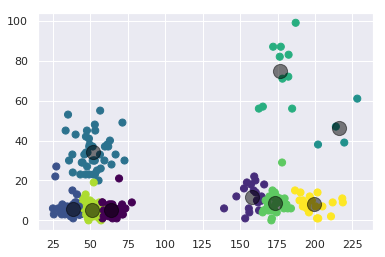

In [0]:
plt.scatter(f1, f2, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Step 4: Iterate Over Several Values of K





Text(0, 0.5, 'Score')

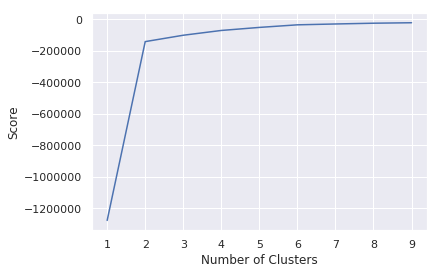

In [0]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

## Feature Engineering



## Standardize the data

In [0]:
from sklearn.preprocessing import StandardScaler
features = ['Distance_Feature', 'Speeding_Feature']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
x[:10,:]

array([[ 2.15280804, -0.50123404],
       [-0.12428265, -0.43320091],
       [-0.69804644, -0.43320091],
       [ 1.75923907, -0.50123404],
       [ 2.18947026, -0.0930353 ],
       [-0.24618454, -0.56926716],
       [-0.49163812,  1.26762717],
       [-0.67421599, -0.50123404],
       [-0.39851607, -0.29713467],
       [-0.58384361, -0.22910154]])

In [0]:
x[:,0]

array([ 2.15280804, -0.12428265, -0.69804644,  1.75923907,  2.18947026,
       -0.24618454, -0.49163812, -0.67421599, -0.39851607, -0.58384361,
       -0.30411085,  1.79901758, -0.29237894, -0.64983561, -0.59374241,
       -0.21355516, -0.73782495, -0.41098123, -0.63920357, -0.83021375,
       -0.70592882, -0.51546857,  2.07820041, -0.75212322, -0.23133634,
       -0.23096971, -0.57559461, -0.30117787, -0.66871666, -0.70189597,
       -0.63462079, -0.19742378, -0.49640421, -0.69291373, -0.71637755,
       -0.34902207, -0.49585428, -0.38770072, -0.55982986, -0.40291554,
        1.66868338, -0.47623999, -0.66853335,  1.84631185, -0.62692172,
       -0.16901056,  2.12714448, -0.43389512, -0.12996529, -0.56991197,
        1.49857066, -0.48247257, -0.38971714, -0.53489954,  1.63825373,
       -0.65166873, -0.19504074, -0.49145481, -0.25498347, -0.60602426,
       -0.17084367, -0.57156177, -0.86870909, -0.57816097,  1.80909969,
       -0.32739136,  1.98306194, -0.65020224, -0.71289464, -0.85

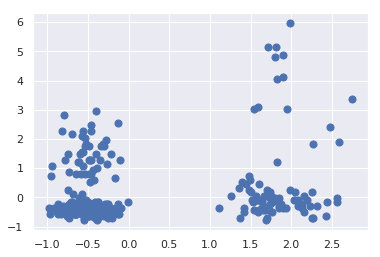

In [0]:
plt.scatter(x[:,0], x[:,1], s=50, cmap='viridis')

In [0]:
df.shape

(400, 3)

Text(0, 0.5, 'Score')

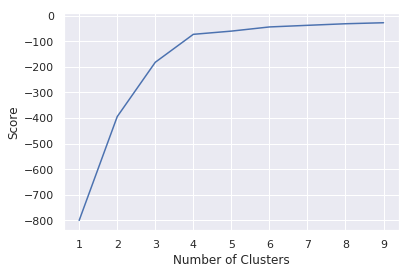

In [0]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in number_clusters]
kmeans

score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

For n_clusters = 2 The average silhouette_score is : 0.694392732449545
For n_clusters = 3 The average silhouette_score is : 0.7517274335255152
For n_clusters = 4 The average silhouette_score is : 0.7815311538717867
For n_clusters = 5 The average silhouette_score is : 0.7845106667634153
For n_clusters = 6 The average silhouette_score is : 0.751801248050038
For n_clusters = 7 The average silhouette_score is : 0.473876663342112
For n_clusters = 8 The average silhouette_score is : 0.3995462463544193
For n_clusters = 9 The average silhouette_score is : 0.41399923894676066


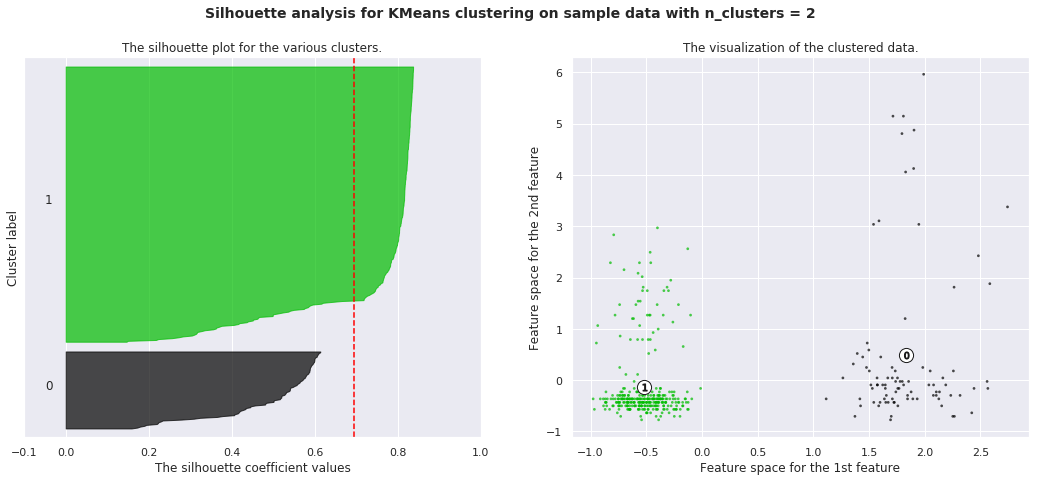

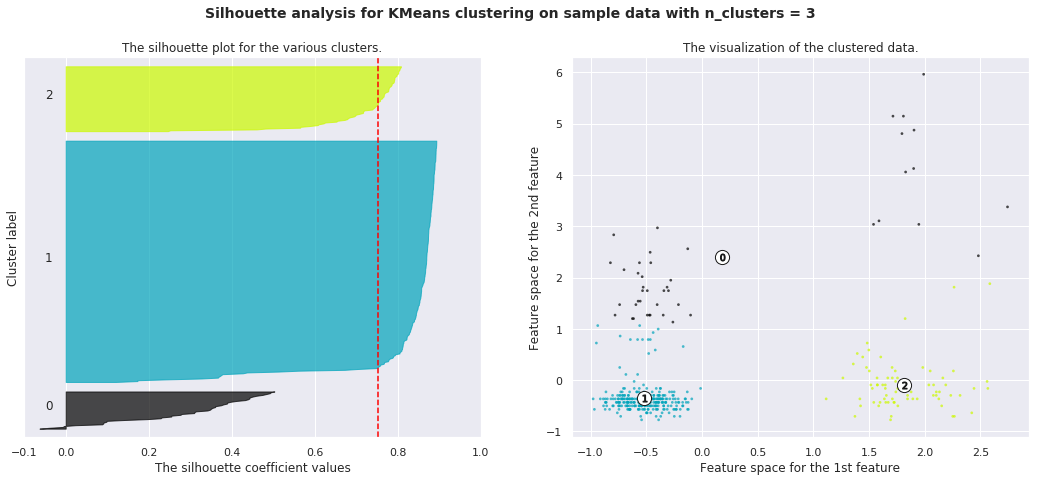

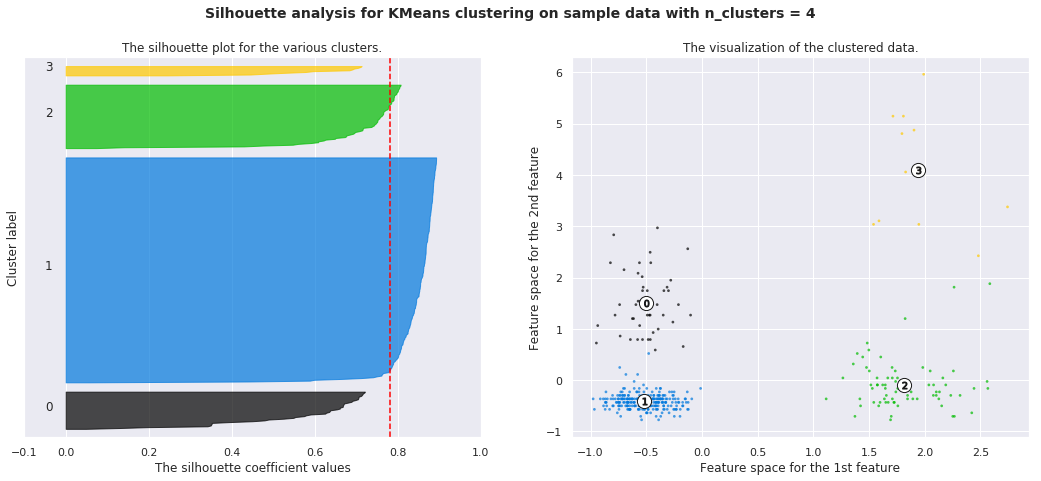

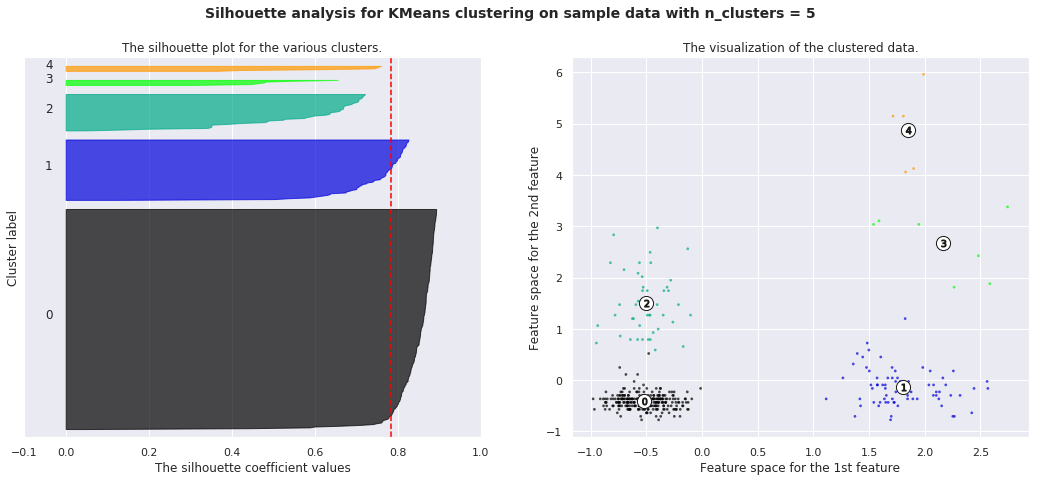

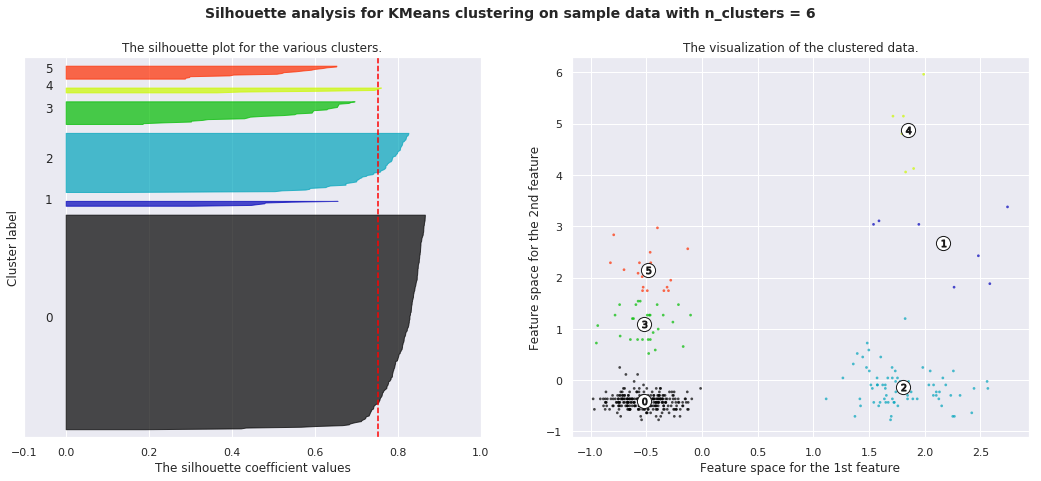

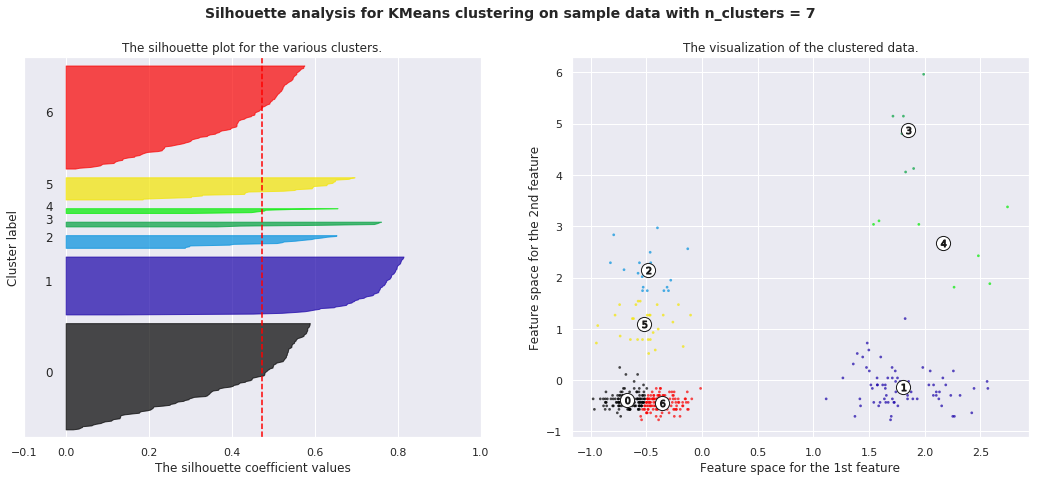

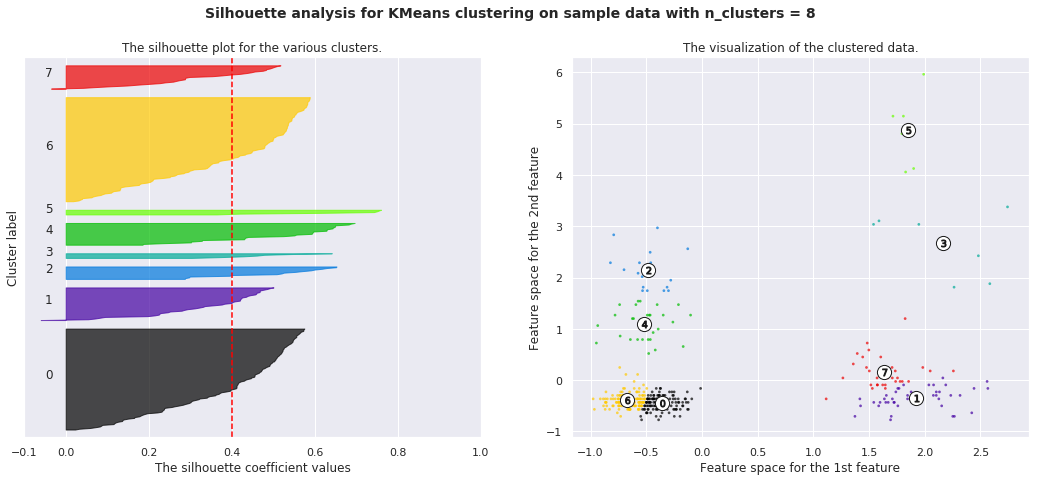

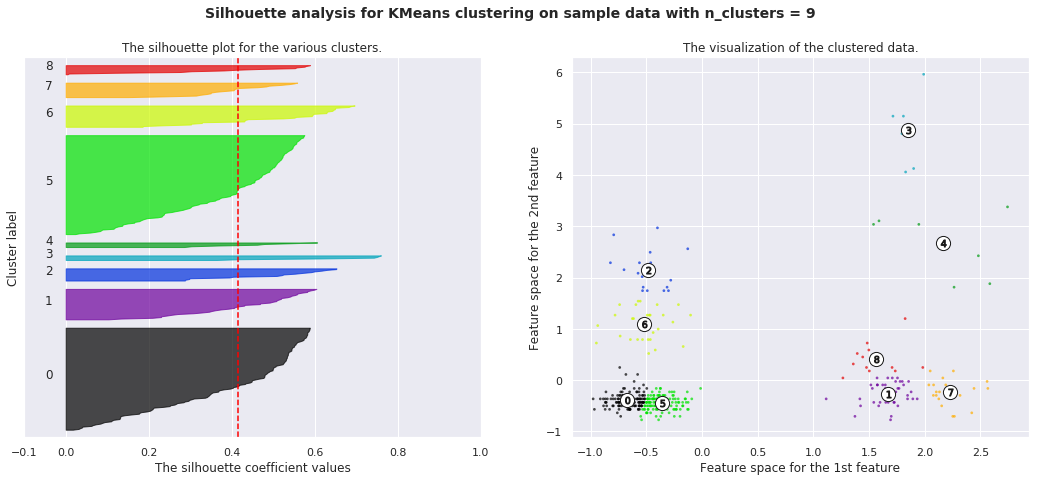

In [0]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [0]:
kmeans = KMeans(n_clusters=4,n_init=100,max_iter=1000).fit(x)

In [0]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [0]:
y_kmeans = kmeans.predict(x)

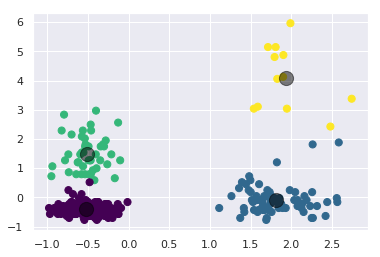

In [0]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Sample of dataset

In [0]:
sample = df.sample(frac = 0.1, random_state=2)
features = ['Distance_Feature', 'Speeding_Feature']
# Separating out the features
xs = sample.loc[:, features].values
xs = StandardScaler().fit_transform(xs)

In [0]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2951 to 2719
Data columns (total 3 columns):
Driver_ID           40 non-null int64
Distance_Feature    40 non-null float64
Speeding_Feature    40 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


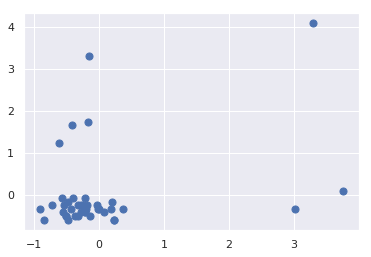

In [0]:
plt.scatter(xs[:,0], xs[:,1], s=50, cmap='viridis')

## Hierarchical

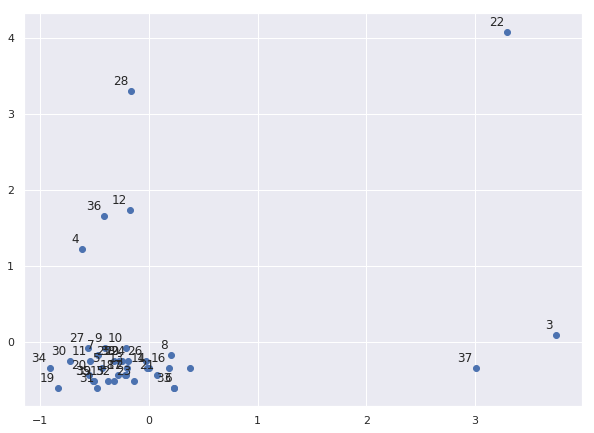

In [0]:
labels = range(1, 40)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(xs[:,0],xs[:,1], label='True Position')

for label, xi, yi in zip(labels, xs[:, 0], xs[:, 1]):  
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

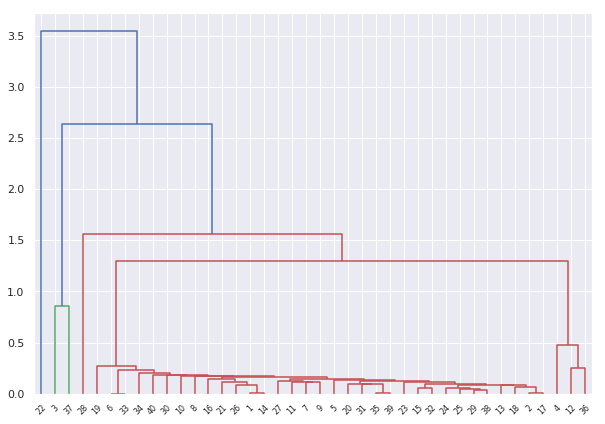

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(xs, 'single')

labelList = range(1, 41)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## Example 2

In [0]:
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [50,50],
    [48,48],
    [49,49],
    [51,51],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [0]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

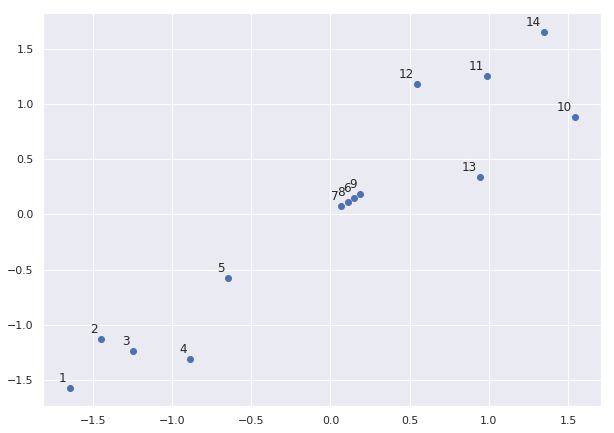

In [0]:
labels = range(1, 15)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show() 

Text(0, 0.5, 'Score')

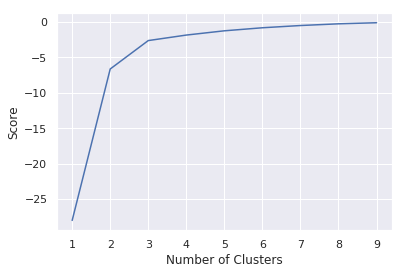

In [0]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

In [0]:
kmeans = KMeans(n_clusters=3,n_init=100,max_iter=1000).fit(X)

In [0]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [0]:
y_kmeans = kmeans.predict(X)

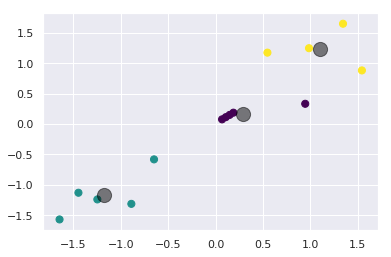

In [0]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Example: Text Clustering I

## references

[reference 1](https://towardsdatascience.com/k-means-clustering-8e1e64c1561c)